<div align='center'>
<font size = 7><font face="Product-Sans"><b><font color= "4285F4">G</font><font color= "DB4437">o</font><font color = "F4B400">o</font><font color= "4285F4">g</font><font color= "0F9D58">l</font><font color= "DB4437">e</font></b></font> - <font color = "C99700">Notre Dame</font></a> <font color = "4285F4">XLS Playground</font></font>
</div>

<div align='center'>
<img src='https://google.github.io/xls/images/xls_logo.svg' alt='XLS Logo' width=400><img src='https://raw.githubusercontent.com/mmorri22/cse30342/main/ND%20Chip%20Logo.png' alt='ND Chip Logo' width=180>
<img src="https://opensource.google/static/images/os-anim-main.gif" width=180>
</div>

<div align='center'>
<font size = 6><font color = "00843D">Lecture 26 - In-Class Solution - Advanced Combinational Logic</font></a></font>
</div>

## XLS Setup

For each new Colab notebook, you will need to run the XLS setup again. If your computer switches networks, or you restart, you will need to run those commands again. This consists of the same two setup steps from Chapter 1. You must run both in order to properly run the XLS flow.


> Note: Here is the common error message that will occur if you ran a DSLX cell and you need need to re-run the setup. If you encounter this message, simply re-run these two steps and the error will be resolved when you go back to that cell:
>
> <code>UsageError: Cell magic `%%dslx` not found.</code>

# <font color = "red">Design Run Setup</font>

## To set up the design flow, run the next cell to set up the back end of XLS

> You will need to run this setup at every new runtime instance.

In [ ]:
#@title Start-up Step 1: XLS and OpenRoad scripts {run:"auto"}

!rm -rf *

# Import required Python libraries
import os
import pathlib
import sys
import jinja2
import IPython.display
import PIL.Image
import graphviz
import pathlib

from IPython.display import display, display_png

# Set Stable XLS Version for classroom environment
xls_version = 'v0.0.0-4699-gfb023174' #@param {type:"string"}

!echo '📦 downloading xls-{xls_version}'
!curl --show-error -L https://github.com/proppy/xls/releases/download/{xls_version}/xls-{xls_version}-linux-x64.tar.gz | tar xzf - --strip-components=1
!echo '🧪 setting up colab integration'
!python -m pip install --quiet --no-cache-dir --ignore-installed https://github.com/proppy/xls/releases/download/{xls_version}/xls_colab-0.0.0-py3-none-any.whl
!python -m pip install logger
!python -m pip install colabtools
import logger
import xls.contrib.colab
_ = xls.contrib.colab.register_dslx_magic()

# Must verify xls_work_dir is created
!if test -d xls_work_dir; then echo "xls_work_dir exists"; else mkdir xls_work_dir;  fi

#@title  First Run Only #4 - OpenRoad Setup {run:"auto"}

yosys_version = '0.38_93_g84116c9a3' #@param {type:"string"}
openroad_version = '2.0_12381_g01bba3695' #@param {type:"string"}
rules_hdl_version = '2eb050e80a5c42ac3ffdb7e70392d86a6896dfc7' #@param {type:"string"}

# Install stable OpenROAD Version
!echo '🛣️ installing openroad and friends'
!curl -L -O https://repo.anaconda.com/miniconda/Miniconda3-py310_24.1.2-0-Linux-x86_64.sh
!bash Miniconda3-py310_24.1.2-0-Linux-x86_64.sh -b -p conda-env/
import pathlib
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
!conda-env/bin/conda install -yq -c "litex-hub" openroad={openroad_version} yosys={yosys_version}

!python -m pip install gdstk tqdm

!gsutil cp gs://proppy-eda/pdk_info_asap7.zip .
!gsutil cp gs://proppy-eda/pdk_info_sky130.zip .

!unzip -q -o pdk_info_asap7.zip
!unzip -q -o pdk_info_sky130.zip

!echo '🧰 generating PDK metadata'
!curl --show-error -L  https://github.com/hdl/bazel_rules_hdl/archive/{rules_hdl_version}.tar.gz | tar xzf - --strip-components=1
!curl -L -O https://github.com/protocolbuffers/protobuf/releases/download/v24.3/protoc-24.3-linux-x86_64.zip
!unzip -q -o protoc-24.3-linux-x86_64.zip
!{sys.executable} -m pip install protobuf

!echo '📁 organizing PDK for XLS and OpenROAD Flows'
!wget https://raw.githubusercontent.com/mmorri22/cse30321/main/xls/xls_setup.py
!wget https://raw.githubusercontent.com/mmorri22/cse30321/main/xls/sky130_data_pdk_info.textproto
!python xls_setup.py
!mv /content/sky130_data_pdk_info.textproto /content/com_google_skywater_pdk_sky130_fd_sc_hd/sky130_data_pdk_info.textproto
!echo '🖼️ Setup for viewing 3D GDSII File'
!python -m pip install numpy
!python -m pip install gdspy
!python -m pip install numpy-stl
!python -m pip install triangle
!python -m pip install k3d

# gdspy is used to open the gds file
import gdspy

# Used to write the output stl file (Why we installed numpy-stl)
from stl import mesh

# Using numpy will permit fast calculations on lots of points
import numpy as np
import matplotlib

# Required to triangulate polygons
import triangle

# To render in 3d
import k3d

📦 downloading xls-v0.0.0-4699-gfb023174
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 40.8M  100 40.8M    0     0  19.7M      0  0:00:02  0:00:02 --:--:-- 24.8M
🧪 setting up colab integration
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 4.8 MB/s eta 0:00:00
🛣️ installing openroad and friends
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  128M  100  128M    0     0   123M      0  0:00:01  0:00:01 --:--:--  123M
PREFIX=/content/conda-env
Unpacking payload ...

Installing base environment...





Preparing transaction: - \ | / - done
Executing transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [ ]:
#@title Start-up Step 2: Select your PDK {run:"auto"}

pdk = 'sky130' #@param ["asap7", "sky130"] {allow-input: false}

xls.contrib.colab.pdk = pdk


#@title Select your PDK {run:"auto"}

!bin/protoc --python_out=. pdk/proto/pdk_info.proto
!ln -sf pdk/proto/pdk_info_pb2.py
import pdk_info_pb2

import enum
import dataclasses
import json
import pathlib
import subprocess
from typing import Any, Callable, Dict, Optional, Union

from google.colab import widgets
from google.protobuf import text_format
import pandas as pd

yosys = conda_prefix_path / 'bin/yosys'
openroad = conda_prefix_path / 'bin/openroad'
yosys_tcl = 'synthesis/synth.tcl'

default_work_dir = xls.contrib.colab.default_work_dir

def pdk_info_proto(
    path: pathlib.Path, optional: bool = False
) -> Optional[pdk_info_pb2.PdkInfoProto]:
  """Load PDK info from prototext.

  Args:
    path: path to prototext file.
    optional: if True, failure to access the pdk info will not produce an error.

  Returns:
    Decoded pdk info proto or None if optional.
  """
  if optional and not path.exists():
    return None
  with path.open('r') as f:
    proto = pdk_info_pb2.PdkInfoProto()
    text_format.Parse(f.read(), proto)
    return proto

pdks = {

    'asap7': {
        'delay_model': 'asap7',
        'pdk_info': pdk_info_proto(
            pathlib.Path('asap7/asap7_data_pdk_info.textproto'),
        ),
    },

    'sky130': {
        'delay_model': 'sky130',
        'pdk_info': pdk_info_proto(
            pathlib.Path('com_google_skywater_pdk_sky130_fd_sc_hd/sky130_data_pdk_info.textproto'),
        ),
    },
}

@dataclasses.dataclass(frozen=True)
class RelativeCoreArea:
  utilization_percent: float


@dataclasses.dataclass(frozen=True)
class AbsoluteCoreArea:
  core_width_microns: int
  core_padding_microns: int


@enum.unique
class ImplementationStep(enum.Enum):
  """Steps in the implementation flow."""

  XLS = 'xls'
  SYNTHESIS = 'synthesis'
  PLACEMENT = 'placement'


class PdkRuntimeError(RuntimeError):
  pass


class OpenroadRuntimeError(RuntimeError):
  pass


class OpenstaRuntimeError(RuntimeError):
  pass


class YosysRuntimeError(RuntimeError):
  pass


@dataclasses.dataclass(frozen=True)
class SynthesisResults:
  synth_v: pathlib.Path
  design_stats: pd.DataFrame
  cell_stats: pd.DataFrame


def run_synthesis(
    *,
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> SynthesisResults:
  """Run synthesis with Yosys.

  Args:
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog and will be where outputs are put.
    silent: Suppress output.

  Returns:
    Metrics from running synthesis.

  Raises:
    PdkRuntimeError: on PDK error.
    YosysRuntimeError: on yosys error.
  """
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = (pathlib.Path(pdk) / pathlib.Path(pdk_info.liberty_path).name).resolve()
  synth_v = (work_dir / 'user_module_synth.v').resolve()
  synth_v_flist = (work_dir / 'user_module_synth_v.flist').resolve()
  synth_uhdm_flist = (work_dir / 'user_module_synth_uhdm.flist').resolve()
  synth_uhdm_flist.touch()
  synth_stats_json = (work_dir / 'user_module_synth_stats.json').resolve()
  dont_use_args = ' '.join(
      f'-dont_use {pat}'
      for pat in pdk_info.do_not_use_cell_list
  )
  # run yosys synthesis
  with synth_v_flist.open('w') as f:
    top_v = work_dir / 'user_module.sv'
    f.write(str(top_v.resolve()))
  !FLIST='{synth_v_flist}' ABC_SCRIPT='' CONSTR='' TOP='user_module' OUTPUT='{synth_v}' UHDM_FLIST='{synth_uhdm_flist}' LIBERTY='{liberty}' STATS_JSON='{synth_stats_json}' DONT_USE_ARGS='{dont_use_args}' {yosys} -c '{yosys_tcl}'
  with synth_stats_json.open('r') as f:
    synth_stats = json.load(f)
  design_stats = synth_stats['design']
  cells_stats = design_stats.pop('num_cells_by_type')
  design_stats = pd.DataFrame.from_dict(
      design_stats, orient='index', columns=['cells']
  )
  cells_stats = pd.DataFrame.from_dict(
      cells_stats, orient='index', columns=['stats']
  )

  return SynthesisResults(
      synth_v=synth_v, design_stats=design_stats, cell_stats=cells_stats
  )


def run_opensta(
    *,
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> pd.DataFrame:
  """Run OpenSta and collect timing metrics.

  Args:
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog.
    silent: Suppress output.

  Returns:
    Dataframe containing timing report.

  Raises:
    OpenstaRuntimeError: on OpenSTA error.
    PdkRuntimeError: on PDK error.
  """
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = pathlib.Path(pdk) / pdk_info.liberty_path
  tech_lef = pathlib.Path(pdk) / pdk_info.tech_lef_path
  read_cell_lefs = '\n'.join(
      f'read_lef {pathlib.Path(pdk) / cell_lef_path}'
      for cell_lef_path in pdk_info.cell_lef_paths
  )
  synth_v = work_dir / 'user_module_synth.v'
  top = 'user_module'
  opensta_log = work_dir / 'user_module_sta.log'

  openroad_script = f"""
  sta::redirect_file_begin {opensta_log}
  read_lef {tech_lef}
  {read_cell_lefs}
  read_liberty {liberty}
  read_verilog {synth_v}
  link_design  {top}
  report_checks -unconstrained
  sta::redirect_file_end
  """
  openroad_tcl = work_dir / 'openroad_sta.tcl'
  with openroad_tcl.open('w') as f:
    f.write(openroad_script)

  # run opensta static timing analysis
  !{openroad} {openroad_tcl} -exit

  columns = ['delay', 'time', 'edge', 'net', 'gate']

  import re
  def sta_report_paths(opensta_log):
    with open(opensta_log) as f:
      sta_report = f.read()
    m = re.search(r'---+(.*)---+', sta_report, flags=re.M | re.S)
    for path in m.group(1).split('\n')[1:-2]:
      parts = path.split(None, maxsplit=len(columns) - 1)
      yield float(parts[0]), float(parts[1]), parts[2], parts[3], parts[4]

  df = pd.DataFrame.from_records(sta_report_paths(opensta_log), columns=columns)
  df['gate'] = df['gate'].str.replace('[()]', '', regex=True)

  return df


@dataclasses.dataclass(frozen=True)
class PlacementResults:
  openroad_global_placement_layout: pathlib.Path
  area: pd.DataFrame
  metrics: pd.DataFrame
  power: pd.DataFrame


def run_placement(
    *,
    clock_period_ps: int,
    placement_density: float,
    core_area: Union[RelativeCoreArea, AbsoluteCoreArea],
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> PlacementResults:
  """Run OpenRoad placement.

  Args:
    clock_period_ps: Clock period in picoseconds.
    placement_density: Placement density in [0.0, 1.0].
    core_area: Relative or absolute core area specification.
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog and will be where outputs are put.
    silent: Suppress output.

  Returns:
    Outputs from running placement.

  Raises:
    OpenroadRuntimeError: on OpenRoad error.
    OpenstaRuntimeError: on OpenSTA error.
    PdkRuntimeError: on PDK error.
    ValueError: on invalid inputs.
    YosysRuntimeError: on yosys error.
  """
  clock_period_ns = clock_period_ps / 1000.0
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = pathlib.Path(pdk) / pdk_info.liberty_path
  tech_lef = pathlib.Path(pdk) / pdk_info.tech_lef_path
  read_cell_lefs = '\n'.join(
      f'read_lef {pathlib.Path(pdk) / cell_lef_path}'
      for cell_lef_path in pdk_info.cell_lef_paths
  )

  if isinstance(core_area, AbsoluteCoreArea):
    die_side_microns = (
        core_area.core_width_microns + core_area.core_padding_microns * 2
    )
    core_side_microns = (
        core_area.core_width_microns + core_area.core_padding_microns
    )
    initialize_floorplan_args = (
        f' -die_area "0 0 {die_side_microns} {die_side_microns}" -core_area'
        f' "{core_area.core_padding_microns} {core_area.core_padding_microns} {core_side_microns} {core_side_microns}"'
    )
  elif isinstance(core_area, RelativeCoreArea):
    initialize_floorplan_args = (
        f' -utilization {core_area.utilization_percent} -aspect_ratio 1.0'
    )
  else:
    raise ValueError(
        'Expected core_area to be AbsoluteCoreArea or RelativeCoreArea, got'
        f' {core_area!r}'
    )

  initialize_floorplan_command = (
      f'initialize_floorplan -site "{pdk_info.cell_site}"'
      f' {initialize_floorplan_args}'
  )

  def source_pdk_info_tcl(path):
    return f'source {pathlib.Path(pdk) / path}' if path else ''

  source_tracks_file = source_pdk_info_tcl(pdk_info.tracks_file_path)
  source_rc_script_configuration = source_pdk_info_tcl(
      pdk_info.rc_script_configuration_path
  )
  source_pdn_config = source_pdk_info_tcl(pdk_info.pdn_config_path)
  if pdk_info.tapcell_tcl_path:
    tapcell_command = source_pdk_info_tcl(pdk_info.tapcell_tcl_path)
  else:
    tapcell_command = (
        f'tapcell -distance {pdk_info.tapcell_distance} -tapcell_master'
        f' {pdk_info.tap_cell}'
    )

  synth_v = work_dir / 'user_module_synth.v'
  openroad_metrics = work_dir / 'openroad_metrics.json'
  openroad_global_placement_layout = work_dir / 'openroad_global_placement.png'

  openroad_script = f"""
  read_lef {tech_lef}
  {read_cell_lefs}
  read_liberty {liberty}
  read_verilog {synth_v}
  link_design user_module
  {initialize_floorplan_command}
  {source_tracks_file}
  insert_tiecells {pdk_info.tie_high_port} -prefix "TIE_ONE_"
  insert_tiecells {pdk_info.tie_low_port} -prefix "TIE_ZERO_"
  create_clock [get_ports clk] -period {clock_period_ns}
  {source_rc_script_configuration}
  set_wire_rc -signal -layer "{pdk_info.wire_rc_signal_metal_layer}"
  set_wire_rc -clock  -layer "{pdk_info.wire_rc_clock_metal_layer}"
  place_pins -hor_layers {pdk_info.pin_horizontal_metal_layer} -ver_layers {pdk_info.pin_vertical_metal_layer}
  {tapcell_command}
  {source_pdn_config}
  pdngen -verbose
  global_placement -timing_driven -routability_driven -density {placement_density} -pad_left {pdk_info.global_placement_cell_pad} -pad_right {pdk_info.global_placement_cell_pad}
  remove_buffers
  estimate_parasitics -placement
  repair_design
  repair_timing
  utl::metric "utilization_percent" [rsz::utilization]
  utl::metric "design_area" [rsz::design_area]
  utl::metric "power" [sta::design_power [sta::parse_corner {{}}]]
  utl::metric "wns" [sta::worst_slack -max]
  report_power
  report_design_area
  if {{[info procs save_image] == "save_image"}} {{
    save_image -resolution 0.005 "{openroad_global_placement_layout}"
  }}
  """
  openroad_tcl = work_dir / 'place.tcl'
  with openroad_tcl.open('w') as f:
    f.write(openroad_script)
  !QT_QPA_PLATFORM=minimal {openroad} -metrics {openroad_metrics} -exit {openroad_tcl}

  with open(work_dir / 'openroad_metrics.json', 'r') as f:
    metrics = json.loads(f.read())
  df_area = pd.DataFrame.from_dict(
      {
          'global placement': [
              float(metrics['design_area']) * 1e12,
              float(metrics['utilization_percent']) * 100,
          ]
      },
      columns=['area', 'utilization'],
      orient='index',
  )
  metrics_power = [float(m) * 1e6 for m in metrics['power'].split(' ')]
  df_power = pd.DataFrame().from_dict(
      {
          'sequential': metrics_power[4:8],
          'combinational': metrics_power[8:12],
          'clock': metrics_power[12:16],
          'macro': metrics_power[16:20],
          'pad': metrics_power[20:],
          'total': metrics_power[0:4],
      },
      orient='index',
      columns=['internal', 'switching', 'leakage', 'total'],
  )
  df_metrics = (
      pd.DataFrame.from_records([metrics])
      .transpose()
      .set_axis(['metrics'], axis=1)
  )
  return PlacementResults(
      openroad_global_placement_layout=openroad_global_placement_layout,
      area=df_area,
      metrics=df_metrics,
      power=df_power,
  )

## In-Class Reading Review - Lecture 26

Discuss for 3-minutes, then class discussion:
<ul>
  <li>Describe <b>tokens</b></li>
  <li>Describe <b>Concurrency</b></li>
  <li>Describe <b>Synchronicity</b></li>
  <li>Describe the <b>Synchronous Model of Computing</b></li>
  <li>Briefly describe how <b>Transaction-Level Modeling</b> is performed</li>
</ul>

### DSLX Structs

Let's base our struct upon the R-Type instruction. We will then use <code>let</code> statements to split in the new module. DSLX structs are similar to C structs, except every element is separated by a <code>,</code> instead of a <code>;</code>. And because they are aligned by bits, they match to exact sizes of the C struct.

<br><code>
struct INSTR{</br>
&nbsp&nbsp&nbsp&nbspfunct7: u7,</br>
&nbsp&nbsp&nbsp&nbsprs2: u5,</br>
&nbsp&nbsp&nbsp&nbsprs1: u5,</br>
&nbsp&nbsp&nbsp&nbspfunct3: u3,</br>
&nbsp&nbsp&nbsp&nbsprd: u5,</br>
&nbsp&nbsp&nbsp&nbspopcode: u7</br>
}</br>
</code>

In [ ]:
%%dslx --top=risc_v_imm_gen --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

struct INSTR{
    funct7: u7,
    rs2: u5,
    rs1: u5,
    funct3: u3,
    rd: u5,
    opcode: u7
}

fn risc_v_imm_gen(instr: INSTR) -> u32{

  // First, perform the simple
  if( instr.opcode == u7:51 ){

      // Return the 32-bit value of 0
      u32:0
  }

  // All I-Type Instructions
  else if( instr.opcode == u7:3 || instr.opcode == u7:107 || instr.opcode == u7:19 ){

      // Extract the immediate
      let immediate:u12 = instr.funct7 ++ instr.rs2;

      // Check the sign bit at funct7[6]
      let sign_bit:u1 = immediate[11+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(immediate, u32:0),

          // trailing irrefutable pattern
          _ => signex(immediate, u32:1)
      }
  }

  // All SB-Type Instructions
  else if( instr.opcode == u7:35 || instr.opcode == u7:99 ){

      // Extract the immediate - 31, 7, 30:25, 11 to 8, and then a 0 bit
      // LSB on left
      let immediate:u13 = instr.funct7[6+:u1] ++ instr.rd[0+:u1] ++ instr.funct7[0:6] ++ instr.rd[1:] ++ u1:0;

      // Check the sign bit at bit 21
      let sign_bit:u1 = instr.funct7[6+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(immediate, u32:0),

          // trailing irrefutable pattern
          _ => signex(immediate, u32:1)
      }

  }

  // All UJ-Type Instructions
  else if( instr.opcode == u7:111 ){

      // Extract the jump offset and shift left by 1
      let jump_offset:u21 = instr.funct7[6+:u1] ++ instr.rs1 ++ instr.funct3 ++ instr.rs2[0+:u1] ++ instr.funct7[0:6] ++ instr.rs2[1:] ++ u1:0;

      // Check the sign bit at bit 31
      let sign_bit:u1 = instr.funct7[6+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(jump_offset, u32:0),

          // trailing irrefutable pattern
          _ => signex(jump_offset, u32:1)
      }

  }

  // lui Instruction - U-type
  else if( instr.opcode == u7:55 ){

      // Extract the lui
      instr.funct7 ++ instr.rs2 ++ instr.rs1 ++ instr.funct3 ++ u12:0

  }

  else{
      // Return the 32-bit value of 0
      u32:0
  }

}

#[test]
fn risc_v_imm_gen_2017_test_I_Type() {

  // Opcode for addi = 0010011
  // rd = 22 = 10110
  // funct3 = 010
  // rs1 = 21 = 10101
  // immediate = 32 = 000000100000
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10000, rs1:u5:0b10101, funct3:u3:0b010, rd:u5:0b10110, opcode:u7:0b0000011};
  assert_eq(risc_v_imm_gen(instr), u32: 16 );

  let instr = INSTR{ funct7:u7:0b1111111, rs2:u5:0b10000, rs1:u5:0b10101, funct3:u3:0b010, rd:u5:0b10110, opcode:u7:0b0000011};
  assert_eq(risc_v_imm_gen(instr), u32: 4294967280 );

}

#[test]
fn risc_v_imm_gen_test_lw() {

  // Opcode for lw = 0000011
  // rd = 22 = 10110
  // funct3 = 010
  // rs1 = 21 = 10101
  // immediate = 32 = 000000100000
  // 0b00000010000010101010101100000011;

  let instr = INSTR{ funct7:u7:0b0000001, rs2:u5:0b10000, rs1:u5:0b10101, funct3:u3:0b010, rd:u5:0b10110, opcode:u7:0b0000011};
  assert_eq(risc_v_imm_gen(instr), u32: 48 );

}

#[test]
fn risc_v_imm_gen_test_R_Type() {

  // Opcode for add = 0110011
  // rd = 22 = 10110
  // funct3 = 000
  // rs1 = 21 = 10101
  // rs2 = 22 = 10110
  // funct7 = 0000000
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};

  assert_eq(risc_v_imm_gen(instr), u32: 0 );

}

#[test]
fn risc_v_imm_gen_test_S_Type() {

  // Opcode for sw = 0100011
  // imm[4:0] = 11100
  // funct3 = 010
  // rs1 = 22 = 10110
  // rs2 = 21 = 10101
  // imm[11:7] = 0000000
  // instr:u32 = u32:0b00000011010110110010111000100011;

  let instr = INSTR{ funct7:u7:0b0000001, rs2:u5:0b10101, rs1:u5:0b10110, funct3:u3:0b010, rd:u5:0b11100, opcode:u7:0b0100011};

  assert_eq(risc_v_imm_gen(instr), u32: 60 );

}

#[test]
fn risc_v_imm_gen_test_UJ_Type() {

  // Opcode for jal = 1101111
  // rd = 22 = 10110
  // jump offset is 120 = 0 00000000 0 0000111100 (0) remove for sign extend;
  // Swap the 00000000 and 0000111100
  // Breakdown: 0 0000111100 0 00000000
  // let instr:u32 = u32:0b00000111100000000000101101101111;

  let instr = INSTR{ funct7:u7:0b0000011, rs2:u5:0b11000, rs1:u5:0b00000, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b1101111};

  assert_eq(risc_v_imm_gen(instr), u32:0b000000000000000001111000 );

}

#[test]
fn risc_v_imm_gen_test_U_Type() {

  // Opcode for lui = 0110111
  // rd = 18 = 10010
  // lui = 248 = 00000000000011111000;
  // let instr:u32 = u32:0b00000000000011111000100100110111;

  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b00000, rs1:u5:0b11111, funct3:u3:0b000, rd:u5:0b10010, opcode:u7:0b0110111};

  // Expected Result: 0b00000000000011111000000000000000
  assert_eq(risc_v_imm_gen(instr), u32: 0b00000000000011111000000000000000 );

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] risc_v_imm_gen_2017_test_I_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_lw
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_R_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_S_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_UJ_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_U_Type
[            OK ]
[===============] 6 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_imm_gen(instr: (bits[7], bits[5], bits[5], bits[3], bits[5], bits[7])) -> bits[32] {
  instr_funct7__4: bits[7] = tuple_index(instr, index=0, id=70, pos=[(0,62,33)])
  literal.71: bits[7] = literal(value=6, id=71, pos=[(0,62,41)])
  dynamic_bit_slice.72: bits[1] = dynamic_bit_slice(instr_funct7__4, literal.71, width=1, id=72, pos=[(0,62,40)])
  instr_rs1: bits[5] = tuple_index(instr, index=2, id=73, pos=[(0,62,56)])
  concat.74: bits[6] = concat(dynamic_bit_slice.72, instr_rs1, id=74, pos=[(0,62,48)])
  instr_funct3: bits[3] = tuple_index(instr, index=3, id=75, pos=[(0,62,69)])
  instr_rs2__1: bits[5] = tuple_index(instr, index=1, id=77, pos=[(0,62,85)])
  literal.78: bits[5] = literal(value=0, id=78, pos=[(0,62,90)])
  concat.76: bits[9] = concat(concat.74, instr_funct3, id=76, pos=[(0,62,61)])
  dynamic_bit_slice.79: bits[1] = dynamic_bit_slice(instr_rs2__1, literal.78, width=1, id=79, pos=[

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_imm_gen(instr: (bits[7], bits[5], bits[5], bits[3], bits[5], bits[7])) -> bits[32] {
  instr_opcode__7: bits[7] = tuple_index(instr, index=5, id=102, pos=[(0,78,16)])
  literal.7: bits[7] = literal(value=3, id=7, pos=[(0,21,27)])
  literal.10: bits[7] = literal(value=107, id=10, pos=[(0,21,51)])
  literal.14: bits[7] = literal(value=19, id=14, pos=[(0,21,77)])
  literal.33: bits[7] = literal(value=35, id=33, pos=[(0,39,27)])
  literal.36: bits[7] = literal(value=99, id=36, pos=[(0,39,52)])
  instr_funct7__6: bits[7] = tuple_index(instr, index=0, id=89, pos=[(0,65,29)])
  instr_rs2__1: bits[5] = tuple_index(instr, index=1, id=77, pos=[(0,62,85)])
  instr_rd: bits[5] = tuple_index(instr, index=4, id=42, pos=[(0,43,54)])
  eq.8: bits[1] = eq(instr_opcode__7, literal.7, id=8, pos=[(0,21,24)])
  eq.11: bits[1] = eq(instr_opcode__7, literal.10, id=11, pos=[(0,21,48)])
  eq.15: bits[1] = eq(instr_opc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] instr,
  output wire [31:0] out
);
  // ===== Pipe stage 0:
  wire [6:0] p0_instr_opcode__7_comb;
  wire [6:0] p0_instr_funct7__6_comb;
  wire [4:0] p0_instr_rs2__1_comb;
  wire [4:0] p0_instr_rd_comb;
  wire p0_sign_bit__2_comb;
  wire [4:0] p0_instr_rs1_comb;
  wire [2:0] p0_instr_funct3_comb;
  wire p0_or_407_comb;
  wire [19:0] p0_concat_412_comb;
  wire [11:0] p0_concat_413_comb;
  wire [10:0] p0_concat_414_comb;
  wire [3:0] p0_concat_415_comb;
  assign p0_instr_opcode__7_comb = instr[6:0];
  assign p0_instr_funct7__6_comb = instr[31:25];
  assign p0_instr_rs2__1_comb = instr[24:20];
  assign p0_instr_rd_comb = instr[11:7];
  assign p0_sign_bit__2_comb = p0_instr_funct7__6_comb[6];
  assign p0_instr_rs1_comb = instr[19:15];
  assign p0_instr_funct3_comb = instr[14:12];
  assign p0_or_407_comb = p0_instr_opcode__7_comb == 7'h03 | p0_instr_opcode__7_comb == 7'h6b | p0_instr_opcode__7_comb == 7'h13;
  assign p0_concat_412_com

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stats
sky130_fd_sc_hd__a21o_1                  22
sky130_fd_sc_hd__a22o_1                   4
sky130_fd_sc_hd__a31oi_1                  2
sky130_fd_sc_hd__a32o_1                   1
sky130_fd_sc_hd__and2_0                   7
sky130_fd_sc_hd__and3_1                   2
sky130_fd_sc_hd__clkinv_1                 1
sky130_fd_sc_hd__lpflow_inputiso1p_1      1
sky130_fd_sc_hd__lpflow_isobufsrc_1       1
sky130_fd_sc_hd__nand2_1                  3
sky130_fd_sc_hd__nand2b_1                 1
sky130_fd_sc_hd__nand3_1                  3
sky130_fd_sc_hd__nand3b_1                 1
sky130_fd_sc_hd__nand4b_1                 1
sky130_fd_sc_hd__nor3_1                   2
sky130_fd_sc_hd__or3_1                    2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cells
num_wires           25.0000
num_wire_bits       87.0000
num_pub_wires       25.0000
num_pub_wire_bits   87.0000
num_memories         0.0000
num_memory_bits      0.0000
num_processes        0.0000
num_cells           54.0000
area               366.6016

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-32.10" *)
module user_module(clk, instr, out);
  (* src = "/content/xls_work_dir/user_module.sv:2.14-2.17" *)
  input clk;
  wire clk;
  (* src = "/content/xls_work_dir/user_module.sv:3.21-3.26" *)
  input [31:0] instr;
  wire [31:0] instr;
  (* src = "/content/xls_work_dir/user_module.sv:4.22-4.25" *)
  output [31:0] out;
  wire [31:0] out;
  wire out_sky130_fd_sc_hd__a21o_1_X_13_B1;
  wire out_sky130_fd_sc_hd__

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

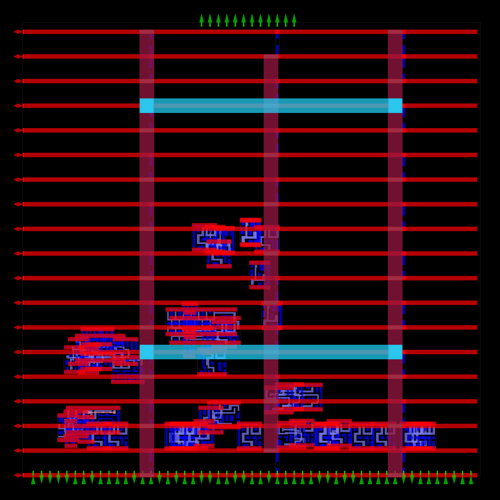

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Run this cell to synthesize the risc_v_imm_gen cell with the Struct {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 10000 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 100 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 50 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

## Controller, ALU Controller, and ALU Design

Next, we will complete the combinational design aspects of the RISC-V datapath by discussing the controller, the ALU control unit, and the ALU design itself.

> Note: The controller for the RISC-V datapath is combinational and updated every cycle based on the opcode. This is different than the control unit in AlbaCore, which uses a Finite State Machine (which we will cover in Reading 14).

Recall from zyBook Participation Activity 4.4.1: How the ALU control bits are set depends on the ALUOp control bits and the different function codes for the R-type instruction.



### Full ALU Controller Truth Table

|Signal|Operation|
|:--|:--|
|<code>0000</code>|AND|
|<code>0001</code>|OR|
|<code>0010</code>|add|
|<code>0110</code>|add|

In [ ]:
%%dslx --top=riscv_simple_alu --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

const ALU_OP_AND = u4:0;    // 0000
const ALU_OP_OR = u4:1;     // 0001
const ALU_OP_ADD = u4:2;    // 0010
const ALU_OP_XOR = u4:3;    // 0011
const ALU_OP_SUB = u4:6;    // 0110
const ALU_OP_SLT = u4:7;    // 0111
const ALU_OP_SLL = u4:8;    // 0100
const ALU_OP_SRL = u4:9;    // 1001
const ALU_OP_LUI = u4:10;   // 1010
const ALU_OP_NOP = u4:15;  // 1111

fn twos_complement(value: u33, bit:u1) -> u33{

    match(bit){
      u1:0 => value,

      _ => {
        let sign_extend_val:u33 = signex(bit, u33:1);
        (value ^ sign_extend_val) + u33:1
      }
    }
}

fn add_sub_32_with_carry(a: u32, b: u32, add_sub: u1) -> (u1, u32) {

  // Expand both busses from 32 to 33
  let a_with_overflow:u33 = a as u33;
  let b_with_overflow:u33 = twos_complement(b as u33, add_sub);

  let result_with_carry = a_with_overflow + b_with_overflow;

  // Get the first eight bits
  // This notation uses the same notation as range in Python
  // [0:32] actually gets the 32 bits from 0 to 31 where 32 is *exclusive*
  let result = result_with_carry[0:32];

  // To access one bit, use the bit you want and +:u1
  let carry_bit = result_with_carry[32+:u1];

  // Finally, return the sum and carry bit
  (carry_bit, result)
}


// We will design the ALU together here
fn riscv_simple_alu(rd1: u32, rd2:u32, alu_ctrl:u4 ) -> (u1, u32){

    // Use if-else instead of match here because of the ADD/SUB case
    if (alu_ctrl == ALU_OP_AND){
        (u1:0, rd1 & rd2)
    }
    else if( alu_ctrl == ALU_OP_OR ){
        (u1:0, rd1 | rd2)
    }
    else if (alu_ctrl == ALU_OP_ADD || alu_ctrl == ALU_OP_SUB) {

        // Bit 2 is the difference between add and sub
        let select = alu_ctrl[2+:u1];

        // Returns (overflow, result)
        add_sub_32_with_carry( rd1, rd2, select )
    }
    else if( alu_ctrl == ALU_OP_XOR ){
        (u1:0, rd1 ^ rd2)
    }
    // Shift Left Logical Use <<
    else if( alu_ctrl == ALU_OP_SLL ){
        (u1:0, rd1 << rd2 )
    }
    // Shift Right Logical >>
    else if( alu_ctrl == ALU_OP_SRL ){
        (u1:0, rd1 >> rd2)
    }
    // Set Less Than - 1 if true, 0 otherwise
    else if( alu_ctrl == ALU_OP_SLT ){
        if( rd1 < rd2 ){
            (u1:0, u32:1)
        }
        else{
            (u1:0, u32:0)
        }
    }

    // Take the 20 lsb of rd2 and shift left by 12
    else if (alu_ctrl == ALU_OP_LUI){
        (u1:0, rd2[0:20] ++ u12:0)
    }

    // Return both as 0 for No Operation
    else if ( alu_ctrl == ALU_OP_NOP ){
        (u1:0, u32:0)
    }

    // The results of jal and jalr come from PC, so we will just pass rd1 here
    else{
        (u1:0, rd1)
    }

}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[===============] 0 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

fn __user_module__twos_complement(value: bits[33], bit: bits[1]) -> bits[33] {
  literal.3: bits[1] = literal(value=0, id=3, pos=[(0,16,6)])
  eq.4: bits[1] = eq(literal.3, bit, id=4)
  sign_extend_val: bits[33] = sign_ext(bit, new_bit_count=33, id=7, pos=[(0,19,40)])
  concat.11: bits[1] = concat(eq.4, id=11)
  xor.8: bits[33] = xor(value, sign_extend_val, id=8, pos=[(0,20,15)])
  literal.9: bits[33] = literal(value=1, id=9, pos=[(0,20,36)])
  one_hot.12: bits[2] = one_hot(concat.11, lsb_prio=true, id=12)
  add.10: bits[33] = add(xor.8, literal.9, id=10, pos=[(0,20,34)])
  literal.5: bits[1] = literal(value=1, id=5, pos=[(0,18,6)])
  literal.6: bits[33] = literal(value=1, id=6, pos=[(0,19,46)])
  ret one_hot_sel.13: bits[33] = one_hot_sel(one_hot.12, cases=[value, add.10], id=13)
}

fn __user_module__add_sub_32_with_carry(a: bits[32], b: bits[32], add_sub: bits[1]) -> (bits[1], bits[32]) {
  zero_ext.18: bits[33] = zero_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__riscv_simple_alu(rd1: bits[32], rd2: bits[32], alu_ctrl: bits[4]) -> (bits[1], bits[32]) {
  literal.336: bits[1] = literal(value=1, id=336, pos=[(0,20,15)])
  not.331: bits[32] = not(rd2, id=331, pos=[(0,20,15)])
  ALU_OP_ADD: bits[4] = literal(value=2, id=28, pos=[(0,4,19)])
  ALU_OP_SUB: bits[4] = literal(value=6, id=36, pos=[(0,6,19)])
  literal.251: bits[1] = literal(value=0, id=251, pos=[(0,62,29)])
  concat.334: bits[33] = concat(literal.336, not.331, id=334, pos=[(0,20,15)])
  literal.256: bits[33] = literal(value=1, id=256, pos=[(0,20,36)])
  ALU_OP_AND: bits[4] = literal(value=0, id=29, pos=[(0,2,19)])
  ALU_OP_OR: bits[4] = literal(value=1, id=32, pos=[(0,3,18)])
  eq.46: bits[1] = eq(alu_ctrl, ALU_OP_ADD, id=46, pos=[(0,56,22)])
  eq.47: bits[1] = eq(alu_ctrl, ALU_OP_SUB, id=47, pos=[(0,56,48)])
  ALU_OP_XOR: bits[4] = literal(value=3, id=37, pos=[(0,5,19)])
  ALU_OP_SLL: bits[4] = litera

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] rd1,
  input wire [31:0] rd2,
  input wire [3:0] alu_ctrl,
  output wire [32:0] out
);
  // ===== Pipe stage 0:
  wire [3:0] p0_ALU_OP_ADD_comb;
  wire [3:0] p0_ALU_OP_SUB_comb;
  wire [3:0] p0_ALU_OP_AND_comb;
  wire [3:0] p0_ALU_OP_OR_comb;
  wire [3:0] p0_ALU_OP_XOR_comb;
  wire [3:0] p0_ALU_OP_SLL_comb;
  wire [3:0] p0_ALU_OP_SRL_comb;
  wire [3:0] p0_ALU_OP_SLT_comb;
  wire [3:0] p0_ALU_OP_LUI_comb;
  wire [3:0] p0_ALU_OP_NOP_comb;
  wire p0_select_comb;
  wire [32:0] p0_add_518_comb;
  wire p0_eq_519_comb;
  wire p0_eq_520_comb;
  wire p0_or_521_comb;
  wire p0_eq_522_comb;
  wire p0_eq_523_comb;
  wire p0_eq_524_comb;
  wire p0_eq_525_comb;
  wire p0_eq_526_comb;
  wire [32:0] p0_rd1_with_overflow_comb;
  wire [32:0] p0_rd2_with_overflow_comb;
  wire p0_nor_530_comb;
  wire [31:0] p0_shrl_531_comb;
  wire [31:0] p0_shll_532_comb;
  wire [31:0] p0_xor_533_comb;
  wire [32:0] p0_result_with_carry_comb;
  wire [31:0] p0_or_5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stats
sky130_fd_sc_hd__a2111oi_0                3
sky130_fd_sc_hd__a211o_1                  5
sky130_fd_sc_hd__a211oi_1                16
sky130_fd_sc_hd__a21o_1                   6
sky130_fd_sc_hd__a21oi_1                143
sky130_fd_sc_hd__a221o_1                 10
sky130_fd_sc_hd__a221oi_1                10
sky130_fd_sc_hd__a22oi_1                  4
sky130_fd_sc_hd__a311oi_1                 4
sky130_fd_sc_hd__a31o_1                   3
sky130_fd_sc_hd__a31oi_1                 14
sky130_fd_sc_hd__a32o_1                   2
sky130_fd_sc_hd__a32oi_1                 16
sky130_fd_sc_hd__a41oi_1                  3
sky130_fd_sc_hd__and2_0                  17
sky130_fd_sc_hd__and3_1                   4
sky130_fd_sc_hd__and3b_1                  1
sky130_fd_sc_hd__clkinv_1                41
sky130_fd_sc_hd__lpflow_inputiso1p_1     14
sky130_fd_sc_hd__lpflow_isobufsrc_1      13
sky130_fd_sc_hd__maj3_1                   9
sky130_fd_sc_hd__mux2_1                  12
sky130_fd_sc_hd__mux2i_1                 23
sky130_fd_sc_hd__mux4_2                   2
sky130_fd_sc_hd__nand2_1                156
sky130_fd_sc_hd__nand2b_1                28
sky130_fd_sc_hd__nand3_1                 33
sky130_fd_sc_hd__nand3b_1                 5
sky130_fd_sc_hd__nand4_1                 12
sky130_fd_sc_hd__nand4b_1                 1
sky130_fd_sc_hd__nor2_1                  99
sky130_fd_sc_hd__nor2b_1                  1
sky130_fd_sc_hd__nor3_1                  25
sky130_fd_sc_hd__nor3b_1                  4
sky130_fd_sc_hd__nor4_1                   7
sky130_fd_sc_hd__o2111a_1                 2
sky130_fd_sc_hd__o2111ai_1                5
sky130_fd_sc_hd__o211a_1                  1
sky130_fd_sc_hd__o211ai_1                23
sky130_fd_sc_hd__o21a_1                   2
sky130_fd_sc_hd__o21ai_0                159
sky130_fd_sc_hd__o221a_1                  1
sky130_fd_sc_hd__o221ai_1                 3
sky130_fd_sc_hd__o22ai_1                 17
sky130_fd_sc_hd__o2bb2ai_1                2
sky130_fd_sc_hd__o311ai_0                 5
sky130_fd_sc_hd__o31ai_1                  3
sky130_fd_sc_hd__o32ai_1                  2
sky130_fd_sc_hd__o41ai_1                  1
sky130_fd_sc_hd__or3_1                   13
sky130_fd_sc_hd__or3b_1                   2
sky130_fd_sc_hd__or4_1                    2
sky130_fd_sc_hd__xnor2_1                 50
sky130_fd_sc_hd__xor2_1                  42

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cells
num_wires          1053.000
num_wire_bits      1150.000
num_pub_wires      1053.000
num_pub_wire_bits  1150.000
num_memories          0.000
num_memory_bits       0.000
num_processes         0.000
num_cells          1081.000
area               6324.816

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-80.10" *)
module user_module(clk, rd1, rd2, alu_ctrl, out);
  (* src = "/content/xls_work_dir/user_module.sv:5.20-5.28" *)
  input [3:0] alu_ctrl;
  wire [3:0] alu_ctrl;
  wire alu_ctrl_sky130_fd_sc_hd__a21oi_1_A1_1_Y;
  wire alu_ctrl_sky130_fd_sc_hd__a21oi_1_A1_B1;
  wire alu_ctrl_sky130_fd_sc_hd__a21oi_1_A1_B1_sky130_fd_sc_hd__xnor2_1_B_Y;
  wire alu_ctrl_sky130_fd_sc_hd__a21oi_1_A1_Y;
  wire alu_ctrl_sky130_fd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

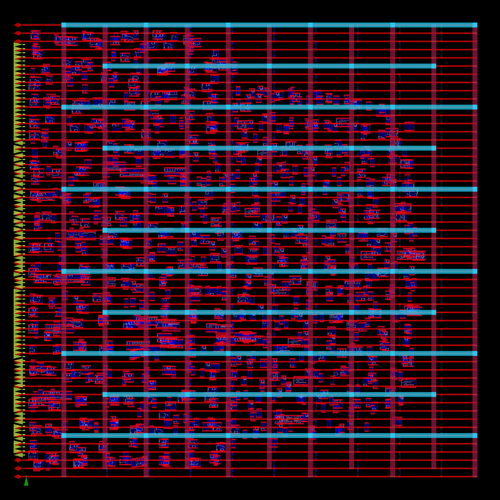

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Run this cell to synthesize the riscv_simple_alu cell {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 10000 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 100 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 150 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

In [ ]:
%%dslx --top=alu_controller --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

const ALU_OP_AND = u4:0;    // 0000
const ALU_OP_OR = u4:1;     // 0001
const ALU_OP_ADD = u4:2;    // 0010
const ALU_OP_XOR = u4:3;    // 0011
const ALU_OP_SUB = u4:6;    // 0110
const ALU_OP_SLT = u4:7;    // 0111
const ALU_OP_SLL = u4:8;    // 0100
const ALU_OP_SRL = u4:9;    // 1001
const ALU_OP_LUI = u4:10;   // 1010
const ALU_OP_NOP = u4:15;  // 1111


// We will design the alu_controller here
fn alu_controller(funct7: u7, funct3:u3, alu_op:u2 ) -> u4{

    // lw and sw both alu_op = 0b00 -> returns add
    if( alu_op == u2:0 ){
        ALU_OP_ADD
    }
    // beq -> alu_op = 0b01 -> returns subtract
    else if( alu_op == u2:1 ){
        ALU_OP_SUB
    }

    // lui will sll by 12 -> 0b11 send ALU_OP_LUI to the ALU
    else if( alu_op == u2:3 ){
        ALU_OP_LUI
    }

    // All R-Type: alu_op = 0b01
    else if( alu_op == u2:2 ){
        match (funct7){
            u7:0 => {
                match(funct3){
                    u3:0 => ALU_OP_ADD,
                    u3:1 => ALU_OP_SLL,
                    u3:2 => ALU_OP_SLT,
                    u3:4 => ALU_OP_XOR,
                    u3:5 => ALU_OP_SRL,
                    u3:6 => ALU_OP_OR,
                    u3:7 => ALU_OP_AND,
                    _ => ALU_OP_NOP
                }
            },

            u7:0b0100000 => {
                match(funct3){
                    u3:0 => ALU_OP_SUB,
                    _ => ALU_OP_NOP
                }
            },

            _ => ALU_OP_NOP
        }
    }

    // Also account for No-Operation Here for the required else case
    else{
        ALU_OP_NOP
    }

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[===============] 0 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__alu_controller(funct7: bits[7], funct3: bits[3], alu_op: bits[2]) -> bits[4] {
  literal.36: bits[3] = literal(value=7, id=36, pos=[(0,42,20)])
  literal.34: bits[3] = literal(value=6, id=34, pos=[(0,41,20)])
  literal.32: bits[3] = literal(value=5, id=32, pos=[(0,40,20)])
  literal.30: bits[3] = literal(value=4, id=30, pos=[(0,39,20)])
  literal.28: bits[3] = literal(value=2, id=28, pos=[(0,38,20)])
  literal.26: bits[3] = literal(value=1, id=26, pos=[(0,37,20)])
  literal.24: bits[3] = literal(value=0, id=24, pos=[(0,36,20)])
  literal.44: bits[3] = literal(value=0, id=44, pos=[(0,49,20)])
  literal.42: bits[7] = literal(value=32, id=42, pos=[(0,47,12)])
  literal.22: bits[7] = literal(value=0, id=22, pos=[(0,34,12)])
  eq.37: bits[1] = eq(literal.36, funct3, id=37)
  eq.35: bits[1] = eq(literal.34, funct3, id=35)
  eq.33: bits[1] = eq(literal.32, funct3, id=33)
  eq.31: bits[1] = eq(literal.30, fu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__alu_controller(funct7: bits[7], funct3: bits[3], alu_op: bits[2]) -> bits[4] {
  literal.22: bits[7] = literal(value=0, id=22, pos=[(0,34,12)])
  literal.232: bits[3] = literal(value=3, id=232)
  literal.36: bits[3] = literal(value=7, id=36, pos=[(0,42,20)])
  literal.34: bits[3] = literal(value=6, id=34, pos=[(0,41,20)])
  literal.32: bits[3] = literal(value=5, id=32, pos=[(0,40,20)])
  literal.30: bits[3] = literal(value=4, id=30, pos=[(0,39,20)])
  literal.28: bits[3] = literal(value=2, id=28, pos=[(0,38,20)])
  literal.26: bits[3] = literal(value=1, id=26, pos=[(0,37,20)])
  literal.44: bits[3] = literal(value=0, id=44, pos=[(0,49,20)])
  literal.42: bits[7] = literal(value=32, id=42, pos=[(0,47,12)])
  literal.555: bits[3] = literal(value=0, id=555, pos=[(0,49,20)])
  eq.100: bits[1] = eq(funct7, literal.22, id=100)
  eq.233: bits[1] = eq(funct3, literal.232, id=233)
  eq.91: bits[1] = eq(funct3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [6:0] funct7,
  input wire [2:0] funct3,
  input wire [1:0] alu_op,
  output wire [3:0] out
);
  // ===== Pipe stage 0:
  wire p0_eq_632_comb;
  wire [7:0] p0_and_641_comb;
  wire [1:0] p0_and_642_comb;
  wire p0_or_649_comb;
  wire p0_or_650_comb;
  wire p0_or_656_comb;
  wire [3:0] p0_ALU_OP_LUI_comb;
  wire [3:0] p0_ALU_OP_SUB_comb;
  wire [3:0] p0_ALU_OP_ADD_comb;
  assign p0_eq_632_comb = funct3 == 3'h0;
  assign p0_and_641_comb = {8{funct7 == 7'h00}} & {funct3 == 3'h3, funct3 == 3'h7, funct3 == 3'h6, funct3 == 3'h5, funct3 == 3'h4, funct3 == 3'h2, funct3 == 3'h1, p0_eq_632_comb};
  assign p0_and_642_comb = {2{funct7 == 7'h20}} & {funct3 != 3'h0, p0_eq_632_comb};
  assign p0_or_649_comb = p0_and_641_comb[7] | p0_and_642_comb[1] | funct7 != 7'h20 & funct7 != 7'h00;
  assign p0_or_650_comb = p0_and_641_comb[2] | p0_or_649_comb;
  assign p0_or_656_comb = p0_or_650_comb | p0_and_641_comb[3];
  assign p0_ALU_OP_LUI_comb = 4'ha;
  assig

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## RISC-V Control Unit


In [ ]:
%%dslx --top=risc_v_controller --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

// ALU Op Control Signals
const ALU_OP_AND = u4:0;    // 0000
const ALU_OP_OR = u4:1;     // 0001
const ALU_OP_ADD = u4:2;    // 0010
const ALU_OP_XOR = u4:3;    // 0011
const ALU_OP_SUB = u4:6;    // 0110
const ALU_OP_SLT = u4:7;    // 0111
const ALU_OP_SLL = u4:8;    // 0100
const ALU_OP_SRL = u4:9;    // 1001
const ALU_OP_LUI = u4:10;   // 1010
const ALU_OP_NOP = u4:15;  // 1111

// Control Signal Enumberated Type
const OPCODE_R_TYPE = u7:51;
const OPCODE_I_TYPE = u7:19;
const OPCODE_LW = u7:3;
const OPCODE_SW = u7:35;
const OPCODE_JALR = u7:103;
const OPCODE_SB_TYPE = u7:99;
const OPCODE_LUI = u7:55;
const OPCODE_JAL = u7:111;

// struct with the control signals
struct CONTROL_SIGNALS{
    alu_src:u1,
    alu_op:u2,
    reg_write:u1,
    mem_read:u1,
    mem_write:u1,
    mem_2_reg:u1,
    pc_src:u1,
    jump: u1
}

fn risc_v_controller( opcode: u7 ) -> CONTROL_SIGNALS{

  // Initialize the Control Signal Values all to 0
  let alu_src:u1 = u1:0b0;
  let alu_op:u2 = u2:0b00;
  let pc_src:u1  = u1:0b0;
  let mem_read:u1  = u1:0b0;
  let mem_write:u1  = u1:0b0;
  let mem_2_reg:u1  = u1:0b0;
  let reg_write:u1 = u1:0b0;
  let jump:u1  = u1:0b0;

  match (opcode){

      // All R-Type Instructions have ALU Op at 10 and RegWrite as 1
      OPCODE_R_TYPE => {
        let alu_op = u2:0b10;
        let reg_write = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // All I-Type instructions have ALUSrc = 1, Reg_Write = 1, and ALU Op as 00
      OPCODE_I_TYPE => {
        let alu_src = u1:0b1;
        let reg_write = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // lw is like Other I types, except mem_read must be 1 and mem2reg is also 1
      OPCODE_LW => {
        let alu_src = u1:0b1;
        let reg_write = u1:0b1;
        let mem_read = u1:0b1;
        let mem_2_reg = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // sw is like Other I types, except mem_write must be 1 and regwrite needs to be 0
      OPCODE_SW => {
        let alu_src = u1:0b1;
        let mem_write = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // Jump and Link Register
      OPCODE_JALR => {
        let jump = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // SB Type Instructions set pc_src to 1
      OPCODE_SB_TYPE => {
        let pc_src = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // Load Upper Immediate Takes the Immediate and stores the result in RD
      OPCODE_LUI => {
        let alu_src = u1:0b1;
        let alu_op = u2:0b11;
        let reg_write = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },
      OPCODE_JAL => {
        let jump = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // This is the NO_OP Case where all the values returned are 0s. Accounts for bad opcodes and for Hazard Detection
      _ => {
          CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      }
  }
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[===============] 0 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_controller(opcode: bits[7]) -> (bits[1], bits[2], bits[1], bits[1], bits[1], bits[1], bits[1], bits[1]) {
  OPCODE_JAL: bits[7] = literal(value=111, id=3, pos=[(0,22,19)])
  OPCODE_LUI: bits[7] = literal(value=55, id=5, pos=[(0,21,19)])
  OPCODE_SB_TYPE: bits[7] = literal(value=99, id=8, pos=[(0,20,23)])
  OPCODE_JALR: bits[7] = literal(value=103, id=4, pos=[(0,19,20)])
  OPCODE_SW: bits[7] = literal(value=35, id=9, pos=[(0,18,18)])
  OPCODE_LW: bits[7] = literal(value=3, id=6, pos=[(0,17,18)])
  OPCODE_I_TYPE: bits[7] = literal(value=19, id=2, pos=[(0,16,22)])
  OPCODE_R_TYPE: bits[7] = literal(value=51, id=7, pos=[(0,15,22)])
  eq.47: bits[1] = eq(OPCODE_JAL, opcode, id=47)
  eq.42: bits[1] = eq(OPCODE_LUI, opcode, id=42)
  eq.39: bits[1] = eq(OPCODE_SB_TYPE, opcode, id=39)
  eq.36: bits[1] = eq(OPCODE_JALR, opcode, id=36)
  eq.32: bits[1] = eq(OPCODE_SW, opcode, id=32)
  eq.26: bits[1] = eq

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_controller(opcode: bits[7]) -> (bits[1], bits[2], bits[1], bits[1], bits[1], bits[1], bits[1], bits[1]) {
  OPCODE_LUI__1: bits[7] = literal(value=55, id=537, pos=[(0,21,19)])
  OPCODE_R_TYPE__1: bits[7] = literal(value=51, id=538, pos=[(0,15,22)])
  OPCODE_I_TYPE: bits[7] = literal(value=19, id=2, pos=[(0,16,22)])
  OPCODE_LW: bits[7] = literal(value=3, id=6, pos=[(0,17,18)])
  OPCODE_SW: bits[7] = literal(value=35, id=9, pos=[(0,18,18)])
  OPCODE_LUI: bits[7] = literal(value=55, id=5, pos=[(0,21,19)])
  ne.521: bits[1] = ne(opcode, OPCODE_LUI__1, id=521)
  ne.522: bits[1] = ne(opcode, OPCODE_R_TYPE__1, id=522)
  OPCODE_R_TYPE: bits[7] = literal(value=51, id=7, pos=[(0,15,22)])
  OPCODE_JALR: bits[7] = literal(value=103, id=4, pos=[(0,19,20)])
  OPCODE_JAL: bits[7] = literal(value=111, id=3, pos=[(0,22,19)])
  eq.107: bits[1] = eq(opcode, OPCODE_I_TYPE, id=107)
  eq.106: bits[1] = eq(opcode, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [6:0] opcode,
  output wire [8:0] out
);
  // ===== Pipe stage 0:
  wire [6:0] p0_OPCODE_LUI__3_comb;
  wire [6:0] p0_OPCODE_R_TYPE__3_comb;
  wire [6:0] p0_OPCODE_I_TYPE_comb;
  wire [6:0] p0_OPCODE_LW_comb;
  wire [6:0] p0_OPCODE_SW_comb;
  wire [6:0] p0_OPCODE_LUI__1_comb;
  wire [6:0] p0_OPCODE_R_TYPE__1_comb;
  wire [6:0] p0_OPCODE_JALR_comb;
  wire [6:0] p0_OPCODE_JAL_comb;
  wire p0_eq_577_comb;
  wire p0_eq_578_comb;
  wire p0_eq_579_comb;
  wire p0_eq_580_comb;
  wire [6:0] p0_OPCODE_SB_TYPE_comb;
  assign p0_OPCODE_LUI__3_comb = 7'h37;
  assign p0_OPCODE_R_TYPE__3_comb = 7'h33;
  assign p0_OPCODE_I_TYPE_comb = 7'h13;
  assign p0_OPCODE_LW_comb = 7'h03;
  assign p0_OPCODE_SW_comb = 7'h23;
  assign p0_OPCODE_LUI__1_comb = 7'h37;
  assign p0_OPCODE_R_TYPE__1_comb = 7'h33;
  assign p0_OPCODE_JALR_comb = 7'h67;
  assign p0_OPCODE_JAL_comb = 7'h6f;
  assign p0_eq_577_comb = opcode == p0_OPCODE_I_TYPE_comb;
  assign p0_eq_578_comb =

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Putting the Combinational Pieces Together

Now that we have multiplexers, ALU control, the Control Unit itself, and the Data Forwarding Logic, we can put the pieces together on all the combinational aspects of the RISC-V Pipelined datapath. In the diagram below, we see all the elements that we will design and test.
<ul>
  <li>Control Unit</li>
  <li>ALU Control Unit</li>
  <li>Multiplexers</li>
  <li>Immediate Generator</li>
  <li>Arithmetic Logic Unit</li>
  <li>Hazard Detection and Data Forwarding Unit</li>
</ul>

The image below shows the RISC-V pipelined datapath that we designed in class, and the busses in bold and Notre Dame gold are the parts that are represented in the <code>risc_v_combinational</code> module below

<img src = "
https://github.com/mmorri22/cse30321/blob/main/xls/lec24/combinational_risc_v.png?raw=true" width=800>

In [ ]:
%%dslx --top=risc_v_combinational --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

// ALU Op constant values
const ALU_OP_AND = u4:0;    // 0000
const ALU_OP_OR = u4:1;     // 0001
const ALU_OP_ADD = u4:2;    // 0010
const ALU_OP_XOR = u4:3;    // 0011
const ALU_OP_SUB = u4:6;    // 0110
const ALU_OP_SLT = u4:7;    // 0111
const ALU_OP_SLL = u4:8;    // 0100
const ALU_OP_SRL = u4:9;    // 0101
const ALU_OP_LUI = u4:10;  // 1010
const ALU_OP_NOP = u4:15;   // 1111

// Control Signal Enumberated Type
const OPCODE_R_TYPE = u7:51;
const OPCODE_I_TYPE = u7:19;
const OPCODE_LW = u7:3;
const OPCODE_SW = u7:35;
const OPCODE_JALR = u7:103;
const OPCODE_SB_TYPE = u7:99;
const OPCODE_LUI = u7:55;
const OPCODE_JAL = u7:111;

// Control Signal Struct
struct CONTROL_SIGNALS{
    alu_src:u1,
    alu_op:u2,
    reg_write:u1,
    mem_read:u1,
    mem_write:u1,
    mem_2_reg:u1,
    pc_src:u1,
    jump: u1
}

// Instruction Struct
struct INSTR{
    funct7: u7,
    rs2: u5,
    rs1: u5,
    funct3: u3,
    rd: u5,
    opcode: u7
}

//////////////////////////////////////////////////////
// Method: risc_v_instr_decode
// Pre-Conditions: 32-bit representing an Instruction
// Post-Conditions: Returns a struct INSTR with a decoded instruction
//////////////////////////////////////////////////////

// Write the risc_v_instr_decode


//////////////////////////////////////////////////////
// Method: risc_v_controller
// Pre-Conditions: 7-bit OPCODE_I_TYPE
// Post-Conditions: Returns a struct CONTROL_SIGNALS struct
//////////////////////////////////////////////////////
fn risc_v_controller( opcode: u7 ) -> CONTROL_SIGNALS{

  // Initialize the Control Signal Values all to 0
  let alu_src:u1 = u1:0b0;
  let alu_op:u2 = u2:0b00;
  let pc_src:u1  = u1:0b0;
  let mem_read:u1  = u1:0b0;
  let mem_write:u1  = u1:0b0;
  let mem_2_reg:u1  = u1:0b0;
  let reg_write:u1 = u1:0b0;
  let jump:u1  = u1:0b0;

  match (opcode){

      // All R-Type Instructions have ALU Op at 10 and RegWrite as 1
      OPCODE_R_TYPE => {
        let alu_op = u2:0b10;
        let reg_write = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // All I-Type instructions have ALUSrc = 1, Reg_Write = 1, and ALU Op as 00
      OPCODE_I_TYPE => {
        let alu_src = u1:0b1;
        let reg_write = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // lw is like Other I types, except mem_read must be 1 and mem2reg is also 1
      OPCODE_LW => {
        let alu_src = u1:0b1;
        let reg_write = u1:0b1;
        let mem_read = u1:0b1;
        let mem_2_reg = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // sw is like Other I types, except mem_write must be 1 and regwrite needs to be 0
      OPCODE_SW => {
        let alu_src = u1:0b1;
        let mem_write = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // Jump and Link Register
      OPCODE_JALR => {
        let jump = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // SB Type Instructions set pc_src to 1
      OPCODE_SB_TYPE => {
        let pc_src = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // Load Upper Immediate Takes the Immediate and stores the result in RD
      OPCODE_LUI => {
        let alu_src = u1:0b1;
        let alu_op = u2:0b11;
        let reg_write = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },
      OPCODE_JAL => {
        let jump = u1:0b1;
        CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      },

      // This is the NO_OP Case where all the values returned are 0s. Accounts for bad opcodes and for Hazard Detection
      _ => {
          CONTROL_SIGNALS{ alu_src:alu_src, alu_op:alu_op, reg_write:reg_write, mem_read:mem_read, mem_write:mem_write, mem_2_reg:mem_2_reg, pc_src:pc_src, jump:jump}
      }
  }
}

//////////////////////////////////////////////////////
// Method: Immediate Generate
// Pre-Conditions: INSTR struct
// Post-Conditions: Returns a 32-bit immediate value
//////////////////////////////////////////////////////
fn risc_v_imm_gen(instr: INSTR) -> u32{

  // First, perform the simple
  if( instr.opcode == u7:51 ){

      // Return the 32-bit value of 0
      u32:0
  }

  // All I-Type Instructions
  else if( instr.opcode == u7:3 || instr.opcode == u7:107 || instr.opcode == u7:19 ){

      // Extract the immediate
      let immediate:u12 = instr.funct7 ++ instr.rs2;

      // Check the sign bit at funct7[6]
      let sign_bit:u1 = immediate[11+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(immediate, u32:0),

          // trailing irrefutable pattern
          _ => signex(immediate, u32:1)
      }
  }

  // All SB-Type Instructions
  else if( instr.opcode == u7:35 || instr.opcode == u7:99 ){

      // Extract the immediate - 31, 7, 30:25, 11 to 8, and then a 0 bit
      // LSB on left
      let immediate:u13 = instr.funct7[6+:u1] ++ instr.rd[0+:u1] ++ instr.funct7[0:6] ++ instr.rd[1:] ++ u1:0;

      // Check the sign bit at bit 21
      let sign_bit:u1 = instr.funct7[6+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(immediate, u32:0),

          // trailing irrefutable pattern
          _ => signex(immediate, u32:1)
      }

  }

  // All UJ-Type Instructions
  else if( instr.opcode == u7:111 ){

      // Extract the jump offset and shift left by 1
      let jump_offset:u21 = instr.funct7[6+:u1] ++ instr.rs1 ++ instr.funct3 ++ instr.rs2[0+:u1] ++ instr.funct7[0:6] ++ instr.rs2[1:] ++ u1:0;

      // Check the sign bit at bit 31
      let sign_bit:u1 = instr.funct7[6+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(jump_offset, u32:0),

          // trailing irrefutable pattern
          _ => signex(jump_offset, u32:1)
      }

  }

  // lui Instruction - U-type
  else if( instr.opcode == u7:55 ){

      // Extract the lui
      instr.funct7 ++ instr.rs2 ++ instr.rs1 ++ instr.funct3 ++ u12:0

  }

  else{
      // Return the 32-bit value of 0
      u32:0
  }

}

//////////////////////////////////////////////////////
// Method: alu_controller
// Pre-Conditions: funct7, funct3, and a 2-bit alu-op
// Post-Conditions: Returns a 4-bit control signal for the ALU
//////////////////////////////////////////////////////
fn alu_controller(funct7: u7, funct3:u3, alu_op:u2 ) -> u4{

    // lw and sw both alu_op = 0b00 -> returns add
    if( alu_op == u2:0 ){
        ALU_OP_ADD
    }
    // beq -> alu_op = 0b01 -> returns subtract
    else if( alu_op == u2:1 ){
        ALU_OP_SUB
    }

    // lui will sll by 12 -> 0b11 send ALU_OP_LUI to the ALU
    else if( alu_op == u2:3 ){
        ALU_OP_LUI
    }

    // All R-Type: alu_op = 0b01
    else if( alu_op == u2:2 ){
        match (funct7){
            u7:0 => {
                match(funct3){
                    u3:0 => ALU_OP_ADD,
                    u3:1 => ALU_OP_SLL,
                    u3:2 => ALU_OP_SLT,
                    u3:4 => ALU_OP_XOR,
                    u3:5 => ALU_OP_SRL,
                    u3:6 => ALU_OP_OR,
                    u3:7 => ALU_OP_AND,
                    _ => ALU_OP_NOP
                }
            },

            u7:0b0100000 => {
                match(funct3){
                    u3:0 => ALU_OP_SUB,
                    _ => ALU_OP_NOP
                }
            },

            _ => ALU_OP_NOP
        }
    }

    // Also account for No-Operation Here for the required else case
    else{
        ALU_OP_NOP
    }

}

//////////////////////////////////////////////////////
// Method: Twos Complement
// Pre-Conditions: 33 bit and an unsigned bit
// Post-Conditions: Returns a 33-bit sign extended value
//////////////////////////////////////////////////////
fn twos_complement(value: u33, bit:u1) -> u33{

    match(bit){
      u1:0 => value,

      _ => {
        let sign_extend_val:u33 = signex(bit, u33:1);
        (value ^ sign_extend_val) + u33:1
      }
    }
}

//////////////////////////////////////////////////////
// Method: add_sub_32_with_carry
// Pre-Conditions: Two 32 bit values and and an unsigned bit
// Post-Conditions: Returns an overflow and a add/sub result
//////////////////////////////////////////////////////
fn add_sub_32_with_carry(a: u32, b: u32, add_sub: u1) -> (u1, u32) {

  // Expand both busses from 32 to 33
  let a_extend:u33 = a[31+:u1] ++ a;
  let b_extend:u33 = b[31+:u1] ++ b;
  let b_twos_complement:u33 = twos_complement(b_extend, add_sub);

  let result_with_carry:u33 = a_extend + b_twos_complement;

  // Get the first eight bits
  // This notation uses the same notation as range in Python
  // [0:32] actually gets the 32 bits from 0 to 31 where 32 is *exclusive*
  let result = result_with_carry[0:32];

  // To access one bit, use the bit you want and +:u1
  let carry_bit = result_with_carry[32+:u1];

  // Finally, return the sum and carry bit
  (carry_bit, result)

}


//////////////////////////////////////////////////////
// Method: riscv_simple_alu
// Pre-Conditions: Two 32 bit values and a 4-bit control signal
// Post-Conditions: Returns an overflow and a 32-bit result
//////////////////////////////////////////////////////
fn riscv_simple_alu(rd1: u32, rd2:u32, alu_ctrl:u4 ) -> (u1, u32){

    // Use if-else instead of match here because of the ADD/SUB case
    if (alu_ctrl == ALU_OP_AND){
        (u1:0, rd1 & rd2)
    }
    else if( alu_ctrl == ALU_OP_OR ){
        (u1:0, rd1 | rd2)
    }
    else if (alu_ctrl == ALU_OP_ADD || alu_ctrl == ALU_OP_SUB) {

        // Bit 2 is the difference between add and sub
        let select = alu_ctrl[2+:u1];

        // Returns (overflow, result)
        add_sub_32_with_carry( rd1, rd2, select )
    }
    else if( alu_ctrl == ALU_OP_XOR ){
        (u1:0, rd1 ^ rd2)
    }
    // Shift Left Logical Use <<
    else if( alu_ctrl == ALU_OP_SLL ){
        (u1:0, rd1 << rd2 )
    }
    // Shift Right Logical >>
    else if( alu_ctrl == ALU_OP_SRL ){
        (u1:0, rd1 >> rd2)
    }
    // Set Less Than - 1 if true, 0 otherwise
    else if( alu_ctrl == ALU_OP_SLT ){
        if( rd1 < rd2 ){
            (u1:0, u32:1)
        }
        else{
            (u1:0, u32:0)
        }
    }

    // Take the 20 lsb of rd2 and shift left by 12
    else if (alu_ctrl == ALU_OP_LUI){
        (u1:0, rd2[0:20] ++ u12:0)
    }

    // Return both as 0 for No Operation
    else if ( alu_ctrl == ALU_OP_NOP ){
        (u1:0, u32:0)
    }

    // The results of jal and jalr come from PC, so we will just pass rd1 here
    else{
        (u1:0, rd1)
    }

}

//////////////////////////////////////////////////////
// Method: mux_64_to_32
// Pre-Conditions: Two 32 bit values and a select bit
// Post-Conditions: Returns a 32-bit result
//////////////////////////////////////////////////////
fn mux_64_to_32( in0: u32, in1: u32, sel: u1 ) -> u32 {

    match(sel){
      u1:0 => in0,
      _ => in1
    }
}

//////////////////////////////////////////////////////
// Method: data_forwarding_logic
// Pre-Conditions: Three u5 register addresses
// Post-Conditions: Returns a 2 bit result indicating which is the most recent
//////////////////////////////////////////////////////
fn data_forwarding_logic( reg_exe: u5, reg_dm: u5, reg_write: u5 ) -> u2 {

    match(reg_exe){
      reg_write => u2:3,
      reg_dm => u2:2,
      _ => u2:0
    }
}


//////////////////////////////////////////////////////
// Method: data_forwarding_mux
// Pre-Conditions: Three u32 register values and a 2-bit select signal
// Post-Conditions: Returns the most recently calculated data value
//////////////////////////////////////////////////////
fn data_forwarding_mux( data_exe: u32, data_mem: u32, data_wb: u32, sel: u2 ) -> u32 {

  // Put wb before reg so that if all 3 are the same, we select wb over reg
  match(sel){
      u2:3 => data_wb,
      u2:2 => data_mem,
      _ => data_exe
  }

}

//////////////////////////////////////////////////////
// Method: risc_v_combinational
// Pre-Conditions: For testing at this stage, we will have
// * An instruction
// * data_rs1 is the value that would come out of the register (which we don't have because no registers yet)
// * data_rs2 is the value that would come out of the register (which we don't have because no registers yet)
// * reg_mem: u5,
// * data_mem: u32
// * reg_wb: u5
// * data_wb: u32
// Post-Conditions: Outputs the value of the arithmetic logic unit
//////////////////////////////////////////////////////
fn risc_v_combinational( instr: INSTR, data_rs1: u32, data_rs2: u32, reg_mem: u5, data_mem: u32,reg_wb: u5, data_wb: u32 ) -> (u1, u32) {

    // Get the control signals based on the opcode
    let control_signals:CONTROL_SIGNALS = risc_v_controller( instr.opcode );

    // Get the immediate value from the immediate generator
    let immediate:u32 = risc_v_imm_gen( instr );

    // Use the instruction and the alu_op control signal to get the 4-bit ALU Control Signal
    let alu_ctrl:u4 = alu_controller(instr.funct7, instr.funct3, control_signals.alu_op);

    // Get the Data Forwarding Control - Use rs1 and rs2 from the instruction
    let df_input_1:u2 = data_forwarding_logic( instr.rs1, reg_mem, reg_wb );
    let df_input_2:u2 = data_forwarding_logic( instr.rs2, reg_mem, reg_wb );

    // Get the Data Forwarding Data Results - Set df_result_1 as alu_input_1
    let alu_input_1:u32 = data_forwarding_mux( data_rs1, data_mem, data_wb, df_input_1 );
    let df_result_2:u32 = data_forwarding_mux( data_rs2, data_mem, data_wb, df_input_2 );

    // Use ALUSrc control signal to differentiate between df_result_2 and immediate
    let alu_input_2:u32 = mux_64_to_32( df_result_2, immediate, control_signals.alu_src );

    // Finally, get the ALU and return the ALU's result
    riscv_simple_alu(alu_input_1, alu_input_2, alu_ctrl )

}

#[test]
fn risc_v_combinational_test_R_type() {

  // Opcode for add = 0110011
  // rd = 22 = 10110
  // funct3 = 000
  // rs1 = 21 = 10101
  // rs2 = 22 = 10110
  // funct7 = 0000000
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};

  // Set data memory reg to x23 and data to 21
  // Set write back reg to 25 and data to 56
  assert_eq(risc_v_combinational(instr, u32: 15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:43) );

  // Now, we will change the instruction to have rs1 be 23 so we use data_mem instead of rs1
  // The data_mem should be forwarded back to rs1 and the result will be 21+28 = 49
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:23, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, u32: 15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:49) );

  // Now, we will change the instruction to have rs1 be 25 so we use data_wb instead of rs1
  // The data_mem should be forwarded back to rs1 and the result will be 56+28 = 84
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:25, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, u32: 15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:84) );

  // Now we'll reset so rs1 is back to 21, and we will change rs2 to 23 so we use data_mem instead of rs2
  // The data_mem should be forwarded back to rs1 and the result will be 15+21 = 36
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:23, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, u32: 15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:36) );

  // Now, we will change the instruction to have rs1 be 25 so we use data_wb instead of rs2
  // The data_mem should be forwarded back to rs1 and the result will be 15+56 = 71
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:25, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, u32: 15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:71) );

  // We've fully tested data forwarding, so now we will reset the instruction and test subtraction. Change one bit in funct7
  // Now we will subtract, so we get 15-28, which is -13, which is u1:1 and u32:0b11111111111111111111111111110011
  let instr = INSTR{ funct7:u7:0b0100000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, u32: 15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:1, u32:0b11111111111111111111111111110011) );

  // Now we will swap the value
  // Now we will subtract, so we get 28-15, which is +13
  let instr = INSTR{ funct7:u7:0b0100000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, u32: 28, u32:15, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:13) );

  // Change funct7 back to all 0's and change funct3 to 11
  // Now, let's test AND.
  let rs1_and:u32 = u32:0b10101010101010101010101010101010;
  let rs2_and:u32 = u32:0b01010101010101010101010101010101;
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b111, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_and, rs2_and, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:0) );

  // Same, but 0R, where we only need to change funct3 to 0b110. The result will be all 1s
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b110, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_and, rs2_and, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:0b11111111111111111111111111111111) );

  // Same, but with XOR, where funct3 is 100, and the result is also also all 1s
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b100, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_and, rs2_and, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:0b11111111111111111111111111111111) );

  // And we'll test the same with OR
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b110, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_and, rs2_and, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:0b11111111111111111111111111111111) );

  // Now we will switch rs2 data to all 1s
  let rs2_and:u32 = u32:0b11111111111111111111111111111111;
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b111, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_and, rs2_and, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:0b10101010101010101010101010101010) );

  // And we'll test the same with OR
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b110, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_and, rs2_and, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:0b11111111111111111111111111111111) );

  // Now, we will do Shift Left Logical. funct3 becomes 001 We will set rs1 to 10110, and then rs2 to 6.
  // This is the same as multiplying 21 by 64, which is 1344
  let rs1_sll:u32 = u32:21;
  let rs2_sll:u32 = u32:6;
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b001, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_sll, rs2_sll, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:1344) );

  // Now, we will do Shift Right Logical. funct3 becomes 101 We will set rs1 to 1344, and then rs2 to 6.
  // This is the same as multiplying 1344 by 64, which is 21
  let rs1_sll:u32 = u32:1344;
  let rs2_sll:u32 = u32:6;
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b101, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_sll, rs2_sll, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:21) );

  // Now, we will do Set Less Than. funct3 becomes 010 We will set rs1 to 21, and then rs2 to 16.
  // This is the same as multiplying 1344 by 64, which is 21
  let rs1_slt:u32 = u32:21;
  let rs2_slt:u32 = u32:16;
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b010, rd:u5:0b10110, opcode:u7:0b0110011};
  assert_eq(risc_v_combinational(instr, rs1_slt, rs2_slt, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:0) );

  // Now, let's switch rs1 and rs2, which will give us 1
  let rs1_slt:u32 = u32:16;
  let rs2_slt:u32 = u32:21;
  assert_eq(risc_v_combinational(instr, rs1_slt, rs2_slt, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:1) );

}

#[test]                                                                                                                                                                                                                                                                                     // fn risc_v_combinational( instr: INSTR, data_rs1: u32, data_rs2: u32, reg_mem: u5, data_mem: u32,reg_wb: u5, data_wb: u32 ) -> (u1, u32) {
// fn risc_v_combinational( instr: INSTR, data_rs1: u32, data_rs2: u32, reg_mem: u5, data_mem: u32,reg_wb: u5, data_wb: u32 ) -> (u1, u32) {
fn risc_v_combinational_test_I_type() {

  // The I-Type Instructions are designed to be the same as the R-Type, except the rs2 and funct7 are combined to be the IMMEDIATE
  // So we will grab the add, and change those values and the opcode

  // Opcode for addi = 0010011
  // rd = 22 = 10110
  // funct3 = 000
  // rs1 = 21 = 10101
  // We will make
  // rs2 = 22 = 10110
  // funct7 = 0000000
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0010011};

  // Set data memory reg to x23 and data to 21
  // Set write back reg to 25 and data to 56
  // The I-Type Instruction should grab 22 instead of 28, so we get 15+22 = 37
  assert_eq(risc_v_combinational(instr, u32: 15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:37) );

  // Now let's change funct7 to 0010000.
  // This will change the value to 001000010110, which is 534. Adding 15 will give 549
  let instr = INSTR{ funct7:u7:0b0010000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0010011};
  assert_eq(risc_v_combinational(instr, u32: 15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:549) );

  // Now let's change funct7 to 1111111.
  // This will change the value to 111111110110, which will sign extend to -10. Adding 15 will give 5
  let instr = INSTR{ funct7:u7:0b1111111, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0010011};
  assert_eq(risc_v_combinational(instr, u32:15, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:5) );

  // Now let's change rd1 to 10.
  // Now we should add 5 and -10, which will give -5
  let instr = INSTR{ funct7:u7:0b1111111, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0010011};
  assert_eq(risc_v_combinational(instr, u32:5, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:1, u32:0b11111111111111111111111111111011) );

}


#[test]                                                                                                                                                                                                                                                                                     // fn risc_v_combinational( instr: INSTR, data_rs1: u32, data_rs2: u32, reg_mem: u5, data_mem: u32,reg_wb: u5, data_wb: u32 ) -> (u1, u32) {
// fn risc_v_combinational( instr: INSTR, data_rs1: u32, data_rs2: u32, reg_mem: u5, data_mem: u32,reg_wb: u5, data_wb: u32 ) -> (u1, u32) {
fn risc_v_combinational_test_lw() {

  // The lw Instructions are designed to be the same as the I-Type
  // We need to change Opcode and funct3

  // Opcode for lw = u7:3
  // rd = 22 = 10110
  // funct3 = 010
  // rs1 = 21 = 10101
  // We will make
  // rs2 = 22 = 10110
  // funct7 = 0000000
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10100, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:3};
  // The I-Type Instruction should grab 20 instead of 28, so we get 1000+20 = 1020
  assert_eq(risc_v_combinational(instr, u32: 1000, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:1020) );

  // Now we will make this negative 20 using 01100  for rs2 and 0b1111111 for funct7
  let instr = INSTR{ funct7:u7:0b1111111, rs2:u5:0b01100, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:3};
  // The I-Type Instruction should grab -20 instead of 28, so we get 1000-20 = 980
  assert_eq(risc_v_combinational(instr, u32: 1000, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:980) );

}


#[test]
fn risc_v_combinational_test_sw() {

  // The SB Instruction is designed to be different than lw, unlike MIPS or Albacore

  // Opcode for sw = u7:0b0100011
  // If we want to store at 20 -> Recall SB does a bitshift of 1 -> 20/2 is 4:1 in rd with 0 at 11
  // rd = 0b:10100
  // funct3 = 010
  // rs1 = 21 = 10101
  // We will make
  // rs2 = 22 = 10110
  // funct7 = 0000000
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10100, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10100, opcode:u7:0b0100011};
  // The I-Type Instruction should grab 20 instead of 28, so we get 1000+20 = 1020
  assert_eq(risc_v_combinational(instr, u32: 1000, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:1020) );

  // Now we will make this negative 20
  // 20 for 6 bits is 0 10100 -> -20 is 1 01100. Removing the LSB gives 1 0110. So the first four bits are 0110. Since it is negative, put 1
  // Therefore, rd = 01101 and funct7 is 1111111
  let instr = INSTR{ funct7:u7:0b1111111, rs2:u5:0b10100, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b01101, opcode:u7:0b0100011};
  assert_eq(risc_v_combinational(instr, u32: 1000, u32:28, u5:23, u32:21, u5:25, u32:56), (u1:0, u32:980) );

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] risc_v_combinational_test_R_type
[            OK ]
[ RUN UNITTEST  ] risc_v_combinational_test_I_type
[            OK ]
[ RUN UNITTEST  ] risc_v_combinational_test_lw
[            OK ]
[ RUN UNITTEST  ] risc_v_combinational_test_sw
[            OK ]
[===============] 4 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

fn __user_module__risc_v_controller(opcode: bits[7]) -> (bits[1], bits[2], bits[1], bits[1], bits[1], bits[1], bits[1], bits[1]) {
  OPCODE_JAL: bits[7] = literal(value=111, id=3, pos=[(0,22,19)])
  OPCODE_LUI: bits[7] = literal(value=55, id=5, pos=[(0,21,19)])
  OPCODE_SB_TYPE: bits[7] = literal(value=99, id=8, pos=[(0,20,23)])
  OPCODE_JALR: bits[7] = literal(value=103, id=4, pos=[(0,19,20)])
  OPCODE_SW: bits[7] = literal(value=35, id=9, pos=[(0,18,18)])
  OPCODE_LW: bits[7] = literal(value=3, id=6, pos=[(0,17,18)])
  OPCODE_I_TYPE: bits[7] = literal(value=19, id=2, pos=[(0,16,22)])
  OPCODE_R_TYPE: bits[7] = literal(value=51, id=7, pos=[(0,15,22)])
  eq.47: bits[1] = eq(OPCODE_JAL, opcode, id=47)
  eq.42: bits[1] = eq(OPCODE_LUI, opcode, id=42)
  eq.39: bits[1] = eq(OPCODE_SB_TYPE, opcode, id=39)
  eq.36: bits[1] = eq(OPCODE_JALR, opcode, id=36)
  eq.32: bits[1] = eq(OPCODE_SW, opcode, id=32)
  eq.26: bits[1] = eq(OPC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_combinational(instr: (bits[7], bits[5], bits[5], bits[3], bits[5], bits[7]), data_rs1: bits[32], data_rs2: bits[32], reg_mem: bits[5], data_mem: bits[32], reg_wb: bits[5], data_wb: bits[32]) -> (bits[1], bits[32]) {
  instr_funct7: bits[7] = tuple_index(instr, index=0, id=371, pos=[(0,448,42)])
  literal.939: bits[7] = literal(value=0, id=939, pos=[(0,245,12)])
  instr_funct3: bits[3] = tuple_index(instr, index=3, id=372, pos=[(0,448,56)])
  literal.1464: bits[3] = literal(value=3, id=1464)
  literal.943: bits[3] = literal(value=7, id=943, pos=[(0,253,20)])
  literal.944: bits[3] = literal(value=6, id=944, pos=[(0,252,20)])
  literal.945: bits[3] = literal(value=5, id=945, pos=[(0,251,20)])
  literal.946: bits[3] = literal(value=4, id=946, pos=[(0,250,20)])
  literal.947: bits[3] = literal(value=2, id=947, pos=[(0,249,20)])
  literal.948: bits[3] = literal(value=1, id=948, pos=[(0,248,20)])
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] instr,
  input wire [31:0] data_rs1,
  input wire [31:0] data_rs2,
  input wire [4:0] reg_mem,
  input wire [31:0] data_mem,
  input wire [4:0] reg_wb,
  input wire [31:0] data_wb,
  output wire [32:0] out
);
  // ===== Pipe stage 0:
  wire [6:0] p0_instr_funct7_comb;
  wire [2:0] p0_instr_funct3_comb;
  wire p0_eq_2276_comb;
  wire [6:0] p0_instr_opcode_comb;
  wire [6:0] p0_OPCODE_I_TYPE_comb;
  wire [6:0] p0_OPCODE_LW_comb;
  wire [6:0] p0_OPCODE_SW_comb;
  wire [6:0] p0_OPCODE_LUI__3_comb;
  wire [6:0] p0_OPCODE_SW__2_comb;
  wire [6:0] p0_OPCODE_LW__2_comb;
  wire [6:0] p0_OPCODE_I_TYPE__2_comb;
  wire [6:0] p0_OPCODE_R_TYPE__3_comb;
  wire p0_eq_2294_comb;
  wire p0_eq_2295_comb;
  wire p0_eq_2296_comb;
  wire [6:0] p0_OPCODE_LUI__1_comb;
  wire [6:0] p0_OPCODE_SB_TYPE_comb;
  wire [6:0] p0_OPCODE_R_TYPE__1_comb;
  wire [6:0] p0_OPCODE_JALR_comb;
  wire [6:0] p0_OPCODE_JAL_comb;
  wire [4:0] p0_instr_rs2_comb;
  wire [7:0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stats
sky130_fd_sc_hd__a2111o_1                 1
sky130_fd_sc_hd__a2111oi_0                5
sky130_fd_sc_hd__a211o_1                  2
sky130_fd_sc_hd__a211oi_1                11
sky130_fd_sc_hd__a21bo_1                  1
sky130_fd_sc_hd__a21boi_0                 3
sky130_fd_sc_hd__a21o_1                   5
sky130_fd_sc_hd__a21oi_1                170
sky130_fd_sc_hd__a221o_1                 23
sky130_fd_sc_hd__a221oi_1                19
sky130_fd_sc_hd__a222oi_1                31
sky130_fd_sc_hd__a22o_1                   6
sky130_fd_sc_hd__a22oi_1                 28
sky130_fd_sc_hd__a2bb2oi_1                1
sky130_fd_sc_hd__a311o_1                  1
sky130_fd_sc_hd__a311oi_1                 6
sky130_fd_sc_hd__a31o_1                   3
sky130_fd_sc_hd__a31oi_1                 14
sky130_fd_sc_hd__a32o_1                   1
sky130_fd_sc_hd__a41oi_1                  2
sky130_fd_sc_hd__and2_0                  22
sky130_fd_sc_hd__and3_1                  11
sky130_fd_sc_hd__and4_1                   2
sky130_fd_sc_hd__and4b_1                  1
sky130_fd_sc_hd__clkinv_1                26
sky130_fd_sc_hd__lpflow_inputiso1p_1     12
sky130_fd_sc_hd__lpflow_isobufsrc_1      12
sky130_fd_sc_hd__maj3_1                  13
sky130_fd_sc_hd__mux2i_1                 36
sky130_fd_sc_hd__nand2_1                260
sky130_fd_sc_hd__nand2b_1                14
sky130_fd_sc_hd__nand3_1                 49
sky130_fd_sc_hd__nand3b_1                 1
sky130_fd_sc_hd__nand4_1                 13
sky130_fd_sc_hd__nand4b_1                 2
sky130_fd_sc_hd__nor2_1                 140
sky130_fd_sc_hd__nor2b_1                  2
sky130_fd_sc_hd__nor3_1                  30
sky130_fd_sc_hd__nor3b_1                  4
sky130_fd_sc_hd__nor4_1                  12
sky130_fd_sc_hd__nor4b_1                  1
sky130_fd_sc_hd__o2111ai_1                5
sky130_fd_sc_hd__o211ai_1                 4
sky130_fd_sc_hd__o21a_1                   3
sky130_fd_sc_hd__o21ai_0                140
sky130_fd_sc_hd__o21bai_1                 1
sky130_fd_sc_hd__o221a_1                  3
sky130_fd_sc_hd__o221ai_1                13
sky130_fd_sc_hd__o22ai_1                 20
sky130_fd_sc_hd__o311a_1                  1
sky130_fd_sc_hd__o311ai_0                 5
sky130_fd_sc_hd__o31ai_1                 10
sky130_fd_sc_hd__o32a_1                   1
sky130_fd_sc_hd__o32ai_1                  3
sky130_fd_sc_hd__or3_1                   10
sky130_fd_sc_hd__or4_1                    3
sky130_fd_sc_hd__xnor2_1                 58
sky130_fd_sc_hd__xor2_1                  30

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cells
num_wires          1282.0000
num_wire_bits      1477.0000
num_pub_wires      1282.0000
num_pub_wire_bits  1477.0000
num_memories          0.0000
num_memory_bits       0.0000
num_processes         0.0000
num_cells          1306.0000
area               7545.9872

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-182.10" *)
module user_module(clk, instr, data_rs1, data_rs2, reg_mem, data_mem, reg_wb, data_wb, out);
  (* src = "/content/xls_work_dir/user_module.sv:2.14-2.17" *)
  input clk;
  wire clk;
  (* src = "/content/xls_work_dir/user_module.sv:7.21-7.29" *)
  input [31:0] data_mem;
  wire [31:0] data_mem;
  (* src = "/content/xls_work_dir/user_module.sv:4.21-4.29" *)
  input [31:0] data_rs1;
  wire [31:0] data_rs1;


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

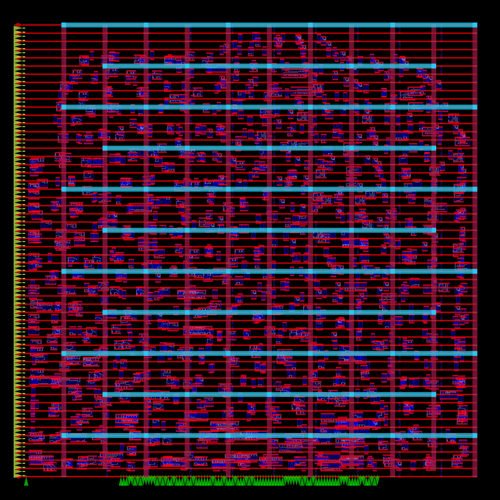

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Run this cell to synthesize the RISC-V Combinational Elements {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 10000 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 100 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 150 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

# 📄 README

Like what you see? 🤝 [Contact us](https://docs.google.com/forms/d/e/1FAIpQLSd1DNMoOxxr73mkIrZXhDWd1gn-jSsL7SMQry6y_JK0caDKlg/viewform?resourcekey=0-1YtZY34PHo-vug_UmFrMQg) 💬 [Join the chat](https://chat.google.com/room/AAAA8aUpxQc?cls=4)

# 🔒 Privacy

 `%%dslx` cell execution count is tracked using [Google Analytics](https://developers.google.com/analytics).